In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
def norm1(A):
    print("One norm : "+str(max(sum(abs(A)))))
    return max(sum(abs(A)))

def norm_inf(A):
    print("Infinity norm : "+str(max(abs(row.sum()) for row in A)))
    return max(abs(row.sum()) for row in A)


def frobeniusNorm(mat,row,col):
    sumSq = 0
    for i in range(row):
        for j in range(col):
            sumSq += pow(mat[i][j], 2)
    res = sqrt(sumSq)
    print("Frobenius Norm : "+str(round(res,5)),end="\n")
    return round(res, 5)

def DD_Check(D):
    A=np.array((D),dtype=float)
    n = len(A[0])
    flag  = False
    for i in range(0,n-1):     # Loop through the columns of the matrix    
        
        sum = np.sum(np.abs(A[i,]))
        sum = sum - np.abs(A[i,i])
        if np.abs(A[i,i]) < sum:
            for k in range(i+1,n):
                sum = np.sum(np.abs(A[k,]))
                sum = sum - np.abs(A[k,i])
                if np.abs(A[k,i]) > sum:
                    A[[i,k]]=A[[k,i]] 
                    print("Swap %d with %d "%(i,k))# Swaps ith and kth rows to each other
                    flag = True
                    break
                else:
                    flag = False
                    return A,"Not Possible"
        
    return A,"Possible"

def gauss_seidel(b,inv_IL,A):
    count = 0
    g_seidel_matrix = np.empty((0,len(A)),float)
    x0 = np.zeros_like(len(A))
    x0 = x0.transpose()
    #x_temp = np.zeros(A)
    x1 = np.zeros_like(len(A))
    while count <= 10:
        x1 = -(np.dot(A,x0)) + np.dot(inv_IL,b)
        #print(x1)
        count += 1
        x0 = x1
        #print(x1[:,1])
        g_seidel_matrix = np.vstack([g_seidel_matrix,x1[:,0]])
        
    return g_seidel_matrix

'''



def Gauss_Seidel(A,e):
    #A = np.array([[6,-2,1,11],[-2,7,2,5],[1,2,-5,-1]])
    n = len(A)
    x0 = np.zeros(n)
    x_temp = np.zeros(n)
    x1 = np.zeros(n)
    #e = 0.0000000001
    count = 0
    g_seidel_matrix = np.array([x0])
    condition = True
    while condition:
        for i in range(0,n):
            x0 = np.copy(x1)
            #x1[i] = np.around((A[i,len(A)] - ( np.sum(A[i,:-1]*x1[i]) - A[i,i]*x1[i] ))/A[i,i],5)
            x1[i] = np.around( (A[i,len(A)] - ( np.sum(np.around(A[i,:-1]*x1,5)) - np.around((A[i,i]*x1[i]),5) ))/(A[i,i]),5)
            x_temp = abs(x1 - x0)
        count += 1
        print(count,end=" ")
        print(x1)
        g_seidel_matrix = np.vstack([g_seidel_matrix,x1])
        condition =  count < 10
    return g_seidel_matrix
#============================================================================================
'''
def Gauss_Jacobi(A,e):
    n = len(A)
    x0 = np.zeros(n)
    x_temp = np.zeros(n)
    x1 = np.zeros(n)
    #e = 0.001
    count = 0
    g_jacobi_matrix = np.array([x0])
    condition = True
    while condition:
        x0 = np.copy(x1)
        for i in range(0,n):
            x1[i] = np.around( (A[i,len(A)] - ( np.sum(np.around(A[i,:-1]*x0,5)) - np.around((A[i,i]*x0[i]),5) ))/(A[i,i]),5)
            
        x_temp = abs(x1 - x0)
        count += 1
        g_jacobi_matrix = np.vstack([g_jacobi_matrix,x1])
        condition = count < 10
    return g_jacobi_matrix

In [3]:
#A = np.random.randint(-50,50,size=(4,4))
#b = np.array([np.random.randint(-50,50,size=4)]).transpose()
A = np.array([[-10,22,-37,35],[-3,43,40,41],[-35,37,12,-49],[22,0,-38,-48]],dtype=float)
b= np.array([[6,-42,-23,43]],dtype=float).transpose()
print(A)
print(b)
A_s = np.copy(A)
A_j = np.copy(A)
b_s = np.copy(b)
b_j = np.copy(b)

print(DD_Check(A))


[[-10.  22. -37.  35.]
 [ -3.  43.  40.  41.]
 [-35.  37.  12. -49.]
 [ 22.   0. -38. -48.]]
[[  6.]
 [-42.]
 [-23.]
 [ 43.]]
(array([[-10.,  22., -37.,  35.],
       [ -3.,  43.,  40.,  41.],
       [-35.,  37.,  12., -49.],
       [ 22.,   0., -38., -48.]]), 'Not Possible')


In [4]:
#Seidel

I = np.eye(len(A))
L = np.zeros_like(A)
U = np.zeros_like(A)

Q = np.append(A,b,axis = 1)
print(Q)
for i in range(0,len(A)):
    temp = A_s[i,i]
    A_s[i,:] = A_s[i,:]/temp
    b_s[i] = b_s[i]/temp
    
    
print(A)  
for i in range(0,len(A)):
    U[i,i+1:] = A_s[i,i+1:] 
    L[i,0:i] = A_s[i,0:i] 

print("Input Matrix : ")
print(A,end="\n\n")

inv_IL = np.linalg.inv(I+L)
temp = np.dot(inv_IL,U)
print("Iteration Matrix : ")
print(str(temp),end="\n\n")


if (frobeniusNorm(temp,len(temp),len(temp)) < 1) or (norm1(temp) < 1 or (norm_inf(temp) < 1)):
    print("It Converges",end="\n\n")
else:
    print("It Diverges",end="\n\n")

   
 
print("Input Matrix : ")
print(str(np.matrix(A)),end="\n\n")
print("Input Vector : ")
print(str(np.matrix(b)),end="\n\n")

print("Iterations :")
itr_seidel = gauss_seidel(b,inv_IL,temp)
for i in range(1,len(itr_seidel)):
    print(str(i)+" - "+str(itr_seidel[i]))

print("-------------------")

euclidean_dist_seidel = np.array([])
for i in range(1,len(itr_seidel)):
    euclidean_dist_seidel = np.append(euclidean_dist_seidel,sqrt(np.sum(np.square(np.abs(itr_seidel[i-1]-itr_seidel[i])))))


itr_seidel = Gauss_Jacobi(Q,0.01)
print(itr_seidel)

[[-10.  22. -37.  35.   6.]
 [ -3.  43.  40.  41. -42.]
 [-35.  37.  12. -49. -23.]
 [ 22.   0. -38. -48.  43.]]
[[-10.  22. -37.  35.]
 [ -3.  43.  40.  41.]
 [-35.  37.  12. -49.]
 [ 22.   0. -38. -48.]]
Input Matrix : 
[[-10.  22. -37.  35.]
 [ -3.  43.  40.  41.]
 [-35.  37.  12. -49.]
 [ 22.   0. -38. -48.]]

Iteration Matrix : 
[[  0.          -2.2          3.7         -3.5       ]
 [  0.          -0.15348837   1.18837209   0.70930233]
 [  0.          -5.94341085   7.12751938 -16.47868217]
 [  0.           3.69686693  -3.94678618  11.44145672]]

Frobenius Norm : 23.46364
One norm : 32.129441214470276
Infinity norm : 15.29457364341085
It Diverges

Input Matrix : 
[[-10.  22. -37.  35.]
 [ -3.  43.  40.  41.]
 [-35.  37.  12. -49.]
 [ 22.   0. -38. -48.]]

Input Vector : 
[[  6.]
 [-42.]
 [-23.]
 [ 43.]]

Iterations :
1 - [ -719.38551357  -157.33346967 -1845.95857915  1174.66551478]
2 - [ 10601.2424113    1294.76242544  31701.65707317 -20195.24241108]
3 - [-185125.00227351  -23191.

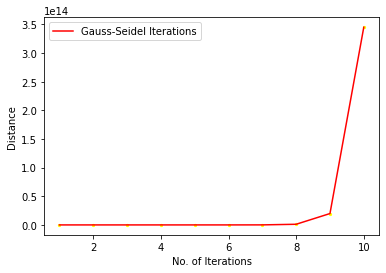

In [5]:
x_axis = np.array([1,2,3,4,5,6,7,8,9,10])
plt.scatter(x_axis,euclidean_dist_seidel,s= 5, color = 'Yellow')
plt.plot(x_axis,euclidean_dist_seidel,color = "Red")
plt.legend(["Gauss-Seidel Iterations"])
#m, b = np.polyfit(theory,number_of_rows,1)
#plt.plot(theory, m*(theory) + b)
#print(m)
plt.xlabel("No. of Iterations")
plt.ylabel("Distance")
plt.show()

In [6]:
#Jacobi
D = np.eye(len(A_j))
L = np.zeros_like(A_j)
U = np.zeros_like(A_j)

    
for i in range(0,len(A)):
    D[i,i] = A_j[i,i]
    U[i,i+1:] = A_j[i,i+1:] 
    L[i,0:i] = A_j[i,0:i]   
   

print("Input Matrix : ")
print(str(np.matrix(A_j)),end="\n\n")

temp = - np.dot(np.linalg.inv(D),L+U)
#print(temp)
print("Iteration Matrix : ")
print(str(temp),end="\n\n")

if (frobeniusNorm(temp,len(temp),len(temp)) < 1) or (norm1(temp) < 1 or (norm_inf(temp) < 1)):
    print("It Converges",end="\n\n")
else:
    print("It Diverges",end="\n\n")

   
print("Input Matrix : ")
print(str(np.matrix(A_j)),end="\n\n")
print("Input Vector : ")
print(str(np.matrix(b_j)),end="\n\n")

itr_jacobi = Gauss_Jacobi(Q,0.01)

for i in range(1,len(itr_jacobi)):
    print(str(i)+" - "+str(itr_jacobi[i]))


euclidean_dist_jacobi = np.array([])

for i in range(1,len(itr_jacobi)):
    euclidean_dist_jacobi = np.append(euclidean_dist_jacobi,sqrt(np.sum(np.square(np.abs(itr_jacobi[i-1]-itr_jacobi[i])))))

Input Matrix : 
[[-10.  22. -37.  35.]
 [ -3.  43.  40.  41.]
 [-35.  37.  12. -49.]
 [ 22.   0. -38. -48.]]

Iteration Matrix : 
[[-0.          2.2        -3.7         3.5       ]
 [ 0.06976744 -0.         -0.93023256 -0.95348837]
 [ 2.91666667 -3.08333333 -0.          4.08333333]
 [ 0.45833333 -0.         -0.79166667 -0.        ]]

Frobenius Norm : 8.25128
One norm : 8.536821705426355
Infinity norm : 3.9166666666666665
It Diverges

Input Matrix : 
[[-10.  22. -37.  35.]
 [ -3.  43.  40.  41.]
 [-35.  37.  12. -49.]
 [ 22.   0. -38. -48.]]

Input Vector : 
[[  6.]
 [-42.]
 [-23.]
 [ 43.]]

1 - [-0.6     -0.97674 -1.91667 -0.89583]
2 - [ 1.20745  1.61851 -4.31302  0.34653]
3 - [20.13175  2.7892  -1.97035  3.07206]
4 - [23.57874 -0.66849 60.74515  9.89108]
5 - [-192.20895  -65.26986  109.30441  -38.17882]
6 - [-682.24588  -79.66213 -517.17422 -175.52426]
7 - [ 1123.35302   599.87734 -2462.89964    95.83773]
8 - [10767.29087  2277.08599  1816.24524  2463.76985]
9 - [ 6912.07626 -3288.476

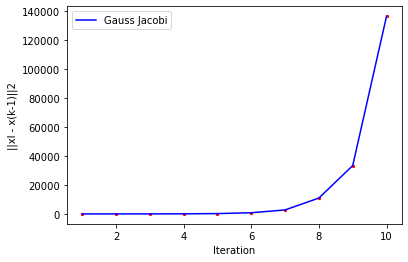

In [7]:
plt.scatter(np.array([1,2,3,4,5,6,7,8,9,10]),euclidean_dist_jacobi,s= 5, color = "red")
plt.plot(np.array([1,2,3,4,5,6,7,8,9,10]),euclidean_dist_jacobi,color = "blue")
plt.legend(["Gauss Jacobi"])
#m, b = np.polyfit(theory,number_of_rows,1)
#plt.plot(theory, m*(theory) + b)
#print(m)
plt.xlabel("Iteration")
plt.ylabel("||xl - x(k-1)||2")
plt.show()

1 - [-3.535300e+00 -1.477000e-02 -1.526301e+01  9.567040e+00]
2 - [  89.32528   10.33134  265.82585 -170.40054]
3 - [-1557.82859  -194.46739 -4641.77781  2959.84016]
4 - [ 27105.5902    3385.87061  80702.30102 -51466.82197]
5 - [ -471284.07533   -58880.1527  -1403189.52193   894852.2745 ]
6 - [  8194247.25595   1023752.03234  24397297.26768 -15558831.24044]
7 - [-1.42473655e+08 -1.78000190e+07 -4.24196666e+08  2.70521934e+08]
8 - [ 2.47719439e+09  3.09489546e+08  7.37552210e+09 -4.70357423e+09]
9 - [-4.30710646e+10 -5.38110545e+09 -1.28238458e+11  8.17812080e+10]
10 - [ 7.48878091e+11  9.35614666e+10  2.22968651e+12 -1.42193269e+12]


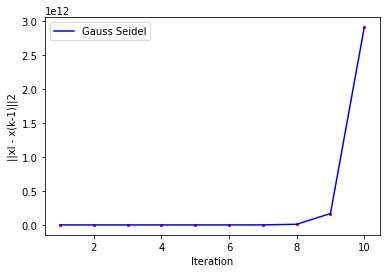

In [8]:
itr_jacobi = np.array([[-0.6  ,   -1.0186 , -0.52598 ,-0.75443],
                        [-3.535300e+00 ,-1.477000e-02 ,-1.526301e+01,  9.567040e+00],
                        [  89.32528  , 10.33134  ,265.82585 ,-170.40054],
                        [-1557.82859 , -194.46739 ,-4641.77781  ,2959.84016],
                        [ 27105.5902 ,   3385.87061  ,80702.30102 ,-51466.82197],
                        [ -471284.07533 ,  -58880.1527 , -1403189.52193  , 894852.2745 ],
                        [  8194247.25595 ,  1023752.03234,  24397297.26768 ,-15558831.24044],
                        [-1.42473655e+08 ,-1.78000190e+07, -4.24196666e+08 , 2.70521934e+08],
                        [ 2.47719439e+09 , 3.09489546e+08,  7.37552210e+09 ,-4.70357423e+09],
                        [-4.30710646e+10 ,-5.38110545e+09, -1.28238458e+11 , 8.17812080e+10],
                        [ 7.48878091e+11 , 9.35614666e+10,  2.22968651e+12 ,-1.42193269e+12]
                       
                      ])

euclidean_dist_jacobi = np.array([])
for i in range(1,len(itr_jacobi)):
    print(str(i)+" - "+str(itr_jacobi[i]))

for i in range(1,len(itr_jacobi)):
    euclidean_dist_jacobi = np.append(euclidean_dist_jacobi,sqrt(np.sum(np.square(np.abs(itr_jacobi[i-1]-itr_jacobi[i])))))
    



plt.scatter(np.array([1,2,3,4,5,6,7,8,9,10]),euclidean_dist_jacobi,s= 5, color = "Red")
plt.plot(np.array([1,2,3,4,5,6,7,8,9,10]),euclidean_dist_jacobi,color = "blue")
plt.legend(["Gauss Seidel"])
#m, b = np.polyfit(theory,number_of_rows,1)
#plt.plot(theory, m*(theory) + b)
#print(m)
plt.xlabel("Iteration")
plt.ylabel("||xl - x(k-1)||2")
plt.show()